In [333]:
from __future__ import print_function    # (at top of module)
import warnings
warnings.filterwarnings('always')
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]
from matplotlib.pyplot import figure
import math
import seaborn as sns
import io, os, sys, types
from pandas.plotting import table
import six

In [334]:
# Read the data from the file
data = pd.read_csv('Data/data_500_entries_youtube.csv')
print("Number of entries in original data: " + str(len(data.index)))
data = data.sample(frac=1).reset_index(drop=True)
data.head()

Number of entries in original data: 570


,song_id,song_title,artist,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration,loudness,valence,mode,youtube_view_count,youtube_video_title
0,spotify:track:15kQGEy89K8deJcZVFEn0N,This Feeling (feat. Kelsea Ballerini),"[The Chainsmokers, Kelsea Ballerini]",89,0.571,0.0912,105.049,0.0439,0.0558,0.000000,4,0.575,1,197947,-7.906,0.449,1,70657281,The Chainsmokers - This Feeling ft. Kelsea Bal...
1,spotify:track:2XXMDz7SPZ4mSFN1PXfHUy,Cuando Te Besé,"[Becky G, Paulo Londra]",91,0.732,0.1060,100.048,0.2130,0.3070,0.000005,4,0.772,9,254383,-3.713,0.295,0,275874297,Becky G Paulo Londra - Cuando Te Besé (Video O...
2,spotify:track:75lcPkAkUsKWHGBlGM476R,1400 / 999 Freestyle,"[Trippie Redd, Juice WRLD]",69,0.572,0.1130,141.991,0.0864,0.0079,0.000000,4,0.825,6,175954,-6.067,0.568,0,2633617,1400 / 999 Freestyle
3,spotify:track:0VNlBq4JKqvlIlveSwC4WJ,Mercedes,[Eno],76,0.782,0.1040,77.511,0.2580,0.3810,0.000000,4,0.775,6,208000,-6.435,0.802,1,25283324,ENO - MERCEDES (Official Video)
4,spotify:track:5TUYLsiIi3tuvR2fCJjZUy,Kikadinha,[Jerry Smith],79,0.662,0.0390,184.091,0.2650,0.1430,0.000475,4,0.756,2,146087,-6.150,0.848,1,42841947,Jerry Smith - Kikadinha (Clipe Oficial)


In [335]:
print(data.columns)

Index(['song_id', 'song_title', 'artist', 'popularity', 'energy', 'liveness',
       'tempo', 'speechiness', 'acousticness', 'instrumentalness',
       'time_signature', 'danceability', 'key', 'duration', 'loudness',
       'valence', 'mode', 'youtube_view_count', 'youtube_video_title'],
      dtype='object')


In [336]:
data.describe()

,popularity,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration,loudness,valence,mode,youtube_view_count
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,76.496491,0.657613,0.177728,122.800695,0.130653,0.251484,0.010485,3.984211,0.702096,5.222807,202636.614035,-6.065332,0.521494,0.573684,7.596583e+07
std,8.981380,0.160919,0.155160,29.437194,0.107296,0.229787,0.072553,0.261327,0.131463,3.584458,39236.547458,2.197471,0.215014,0.494975,1.708684e+08
min,51.000000,0.093500,0.022200,64.934000,0.025600,0.000046,0.000000,1.000000,0.264000,0.000000,90933.000000,-15.662000,0.039000,0.000000,4.270000e+02
25%,70.000000,0.559000,0.091925,99.940250,0.048600,0.065825,0.000000,4.000000,0.618250,1.000000,181178.250000,-7.392000,0.357250,0.000000,3.028858e+06
50%,76.000000,0.675500,0.116000,120.695500,0.086250,0.186500,0.000000,4.000000,0.720500,6.000000,199442.000000,-5.823000,0.520000,1.000000,1.848132e+07
75%,83.000000,0.773750,0.197750,142.985750,0.188750,0.371000,0.000010,4.000000,0.797000,8.000000,219419.250000,-4.586000,0.699500,1.000000,7.062040e+07
max,100.000000,0.984000,0.985000,203.911000,0.530000,0.989000,0.905000,5.000000,0.975000,11.000000,417920.000000,-0.787000,0.960000,1.000000,1.956582e+09


Number of examples >= 50 popularity: 570-> 100.0%
Number of examples >= 60 popularity: 558-> 97.89473684210526%
Number of examples >= 70 popularity: 446-> 78.24561403508773%
Number of examples >= 80 popularity: 197-> 34.56140350877193%
Number of examples >= 90 popularity: 55-> 9.649122807017545%
Number of examples >= 100 popularity: 1-> 0.17543859649122806%


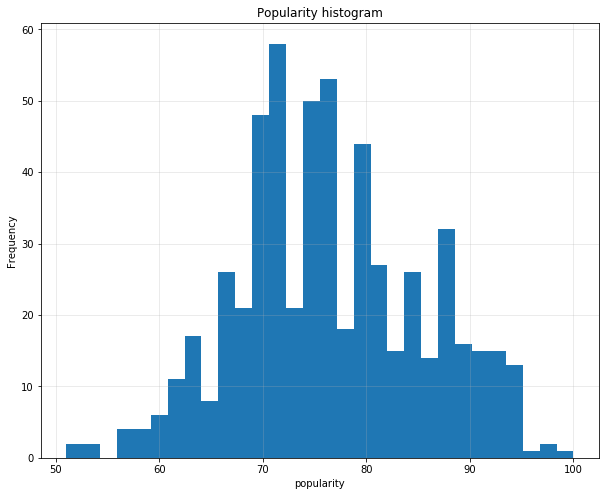

In [337]:
N = len(data.index)
d = len(data.columns) - 2
for i in range(50, 101, 10):
    no_examples = len(data[data.popularity >= i].index)
    per_examples = 100.0 * no_examples/N
    print("Number of examples >= " + str(i) 
          + " popularity: " + str(no_examples) 
          + "-> " + str(per_examples) +"%")
data['popularity'].plot.hist(bins=30, rwidth=10,figsize=(10,8))
plt.xlabel('popularity')
plt.title("Popularity histogram")
plt.grid(alpha=0.3)

In [338]:
from project_modules import *
final_data = label_data(data, 75)

Number of popular examples after thresholding :  292
Number of not popular examples after thresholding :  278


In [339]:
final_data.drop(['song_id', 'song_title', 'artist', 'popularity','youtube_view_count', 'youtube_video_title'], 1, inplace=True)

In [340]:
COLUMNS_TO_SCALE = ["energy", "liveness", "tempo", 
                    "speechiness", "acousticness", "instrumentalness", 
                    "time_signature", "danceability", "key", 
                    "duration", "loudness", "valence", "mode"]

scaled_data = scale_data_normalize(final_data, COLUMNS_TO_SCALE)
scaled_data.head()

C:\Users\Rares\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration,loudness,valence,mode,is_popular
0,0.536216,0.071666,0.288645,0.036281,0.056377,0.000000,0.75,0.437412,0.090909,0.327273,0.521412,0.445168,1.0,1
1,0.717013,0.087038,0.252661,0.371531,0.310383,0.000006,0.75,0.714487,0.818182,0.499867,0.803294,0.277959,0.0,1
2,0.537339,0.094308,0.554459,0.120539,0.007942,0.000000,0.75,0.789030,0.545455,0.260013,0.645042,0.574376,0.0,0
3,0.773161,0.084961,0.090497,0.460745,0.385209,0.000000,0.75,0.718706,0.545455,0.358017,0.620303,0.828447,1.0,1
4,0.638405,0.017449,0.857386,0.474623,0.144551,0.000525,0.75,0.691983,0.181818,0.168673,0.639462,0.878393,1.0,1


In [342]:
# X will be our examples and y will be our labels
X = np.array(scaled_data.drop('is_popular', axis=1))
y = np.array(scaled_data['is_popular'])
print(X)
print()
print()
print(y)

# SKLEARN DATASET
# from sklearn import datasets
# data = datasets.load_breast_cancer()
# X = np.array(data.data)
# y= np.array(data.target)
# print(X)

[[0.53621561 0.07166597 0.28864488 ... 0.52141176 0.4451683  1.        ]
 [0.71701291 0.08703781 0.25266051 ... 0.80329412 0.27795874 0.        ]
 [0.53733857 0.09430827 0.55445865 ... 0.64504202 0.57437568 0.        ]
 ...
 [0.55530601 0.06771915 0.68386136 ... 0.61882353 0.35722041 0.        ]
 [0.52274003 0.24906523 0.36012434 ... 0.70769748 0.47122693 1.        ]
 [0.6316676  0.198172   0.25266771 ... 0.6890084  0.35287731 1.        ]]


[1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 1 0 1 0 1 

In [343]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn.model_selection import cross_val_score

In [344]:
k_range = list(range(1, 20, 2))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=KFold(n_splits=10), scoring='roc_auc')
    k_scores.append(scores.mean())
print(k_scores)

[0.5440283974867015, 0.5541371728032216, 0.5550435420504003, 0.5745389062138682, 0.5812915940598031, 0.5806869438589228, 0.5777591512907405, 0.573899705490619, 0.5676828139720211, 0.5601285507536022]


Text(0, 0.5, 'CV mean F1 score')

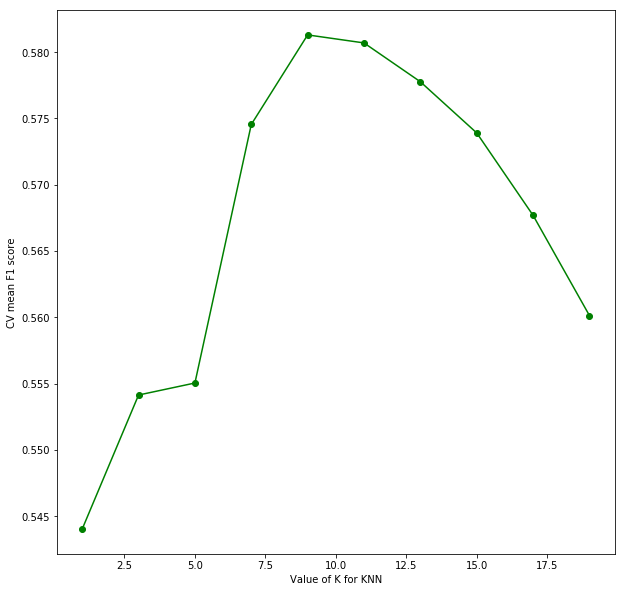

In [345]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores, 'go-')
plt.xlabel('Value of K for KNN')
plt.ylabel('CV mean F1 score')

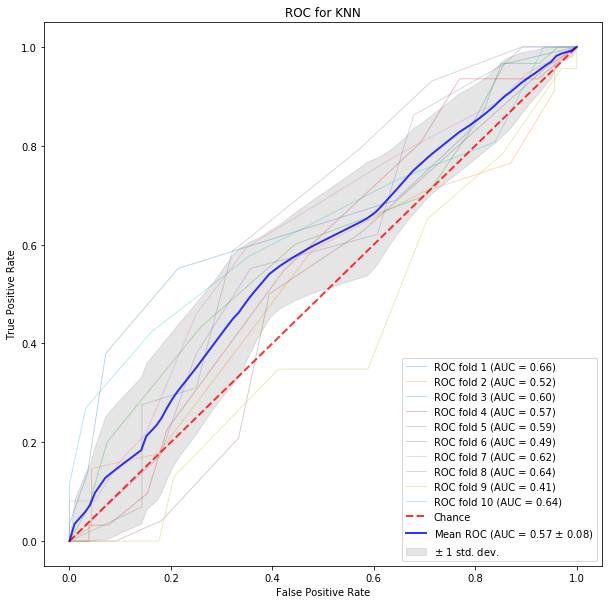

Accuracy mean:  0.5719298245614035

F1 mean:  0.5728519343916761


In [346]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
nbrs = KNeighborsClassifier(n_neighbors=15)
cv = KFold(n_splits=10)
X = np.array(X)
y = np.array(y)
tprs=[]
f1s = []
aucs=[]
accs=[]
i=0
mean_fpr = np.linspace(0, 1, 100)
for train, test in cv.split(X, y):
    probas_ = nbrs.fit(X[train], y[train]).predict_proba(X[test])
    predicts = nbrs.predict(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    conf_matrix = confusion_matrix(y[test], predicts)
    #roc_auc = auc(fpr, tpr)
    roc_auc = roc_auc_score(y[test], probas_[:, 1], average="weighted")
    aucs.append(roc_auc)
    f1s.append(f1_score(y[test], predicts, average="weighted"))
    accs.append(accuracy_score(y[test], predicts))
    i += 1
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.show()

print("Accuracy mean: ",np.mean(accs))
print()
print("F1 mean: ", np.mean(f1s))